In [98]:
#Goal: You need to create a model that can predict whether the given SMS is a Spam or HAM sms


In [99]:
import pandas as pd
import numpy as np


In [100]:
data = pd.read_csv("C:/Users/micha/yelp.csv")

In [101]:
data['stars'] = data['stars'].map({1:0, 2:0, 3:1, 4:1, 5:1})

In [102]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,1,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,1,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,1,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,1,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [104]:
data.stars.value_counts()

stars
1    8324
0    1676
Name: count, dtype: int64

In [105]:
#For wordcloud following is suggested to get good understanding of the data:
# a. Always normalize the data (ensure each word follows same case - e.g. lowercase)
# b. Remove stopwords

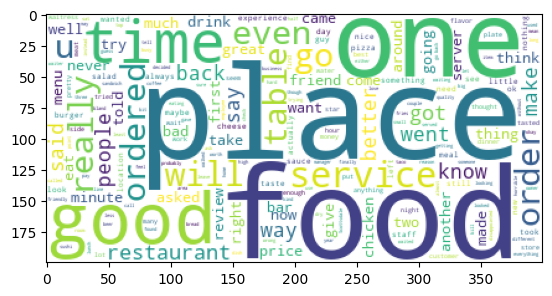

In [106]:
#Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Seperate Spam Messages and Ham MEssages

spamMsg = data[data['stars'] == 0]['text']
hamMsg = data[data['stars'] == 1]['text']

spam_textData = "".join(spamMsg)

spamWordCloud = WordCloud(background_color='white').generate(spam_textData)

plt.imshow(spamWordCloud)



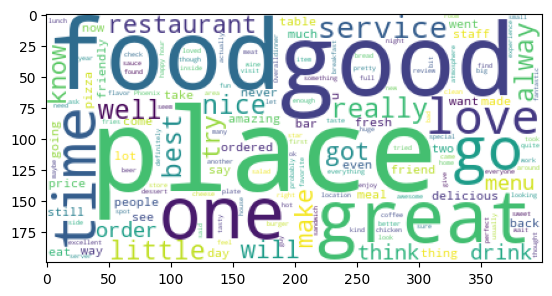

In [107]:
spamMsg = data[data['stars'] == 0]['text']
hamMsg = data[data['stars'] == 1]['text']

ham_textData = "".join(hamMsg)

hamWordCloud = WordCloud(background_color='white').generate(ham_textData)

plt.imshow(hamWordCloud)



In [108]:
#If there exists any missing values in feature column(purestring), simply DELETE that record.
#If dataset is unbalanced, you cannot use SMOTE to deal with balancing. The only option is to physically reduce bias label.

In [109]:
#Seperate data as features and label

features = data.iloc[:,[4]].values
label = data.iloc[:,[3]].values

In [110]:
features[:4]

array([['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'],
       ['I have no idea why some people give bad reviews about this place. It goes to sh

In [111]:
#Perform text preprocessing
# You can be creative.
# Text Preprocessing Steps:
# 1. Remove Punctuations
# 2. Extract words out of the sentence
# 3. Normalize words in lowercase
# 4. Remove stopwords
# 5. Apply Advanced normalization (Stemming and Lemma)

In [112]:
sample = "Welcome to Simplilearn! You are learning NLP."
import string

processedText = ''.join([ char for char in sample if char not in string.punctuation ])
print(processedText)
[word.lower() for word in processedText.split()]

Welcome to Simplilearn You are learning NLP


['welcome', 'to', 'simplilearn', 'you', 'are', 'learning', 'nlp']

In [113]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
#Function to create text preprocessing
#Function to preprocess data
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def textPreprocessing(document):
  #Remove Punctuations
  processedData = ''.join([char for char in document if char not in string.punctuation])
  #Seperate words from document and normalize it
  wordsInLowerCase = [word.lower() for word in processedData.split(" ")]
  #Generate Vocab
  return [word for word in wordsInLowerCase if word not in stopwords.words('english')]
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
textPreprocessing(sample)

['welcome', 'simplilearn', 'learning', 'nlp']

In [116]:
#Bag of Words using Sklearn
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textPreprocessing)

#Build the vocab

finalWordVectorVocab = wordVector.fit(features)


In [117]:
finalWordVectorVocab.vocabulary_

{'wife': 78441,
 'took': 73301,
 'birthday': 14838,
 'breakfast': 16165,
 'excellent.': 29888,
 '': 0,
 'weather': 77600,
 'perfect': 54795,
 'made': 45812,
 'sitting': 65496,
 'outside': 52989,
 'overlooking': 53208,
 'grounds': 36225,
 'absolute': 8784,
 'pleasure.': 56286,
 'waitress': 76924,
 'excellent': 29874,
 'food': 32538,
 'arrived': 11655,
 'quickly': 58606,
 'semi-busy': 63892,
 'saturday': 62779,
 'morning.': 49024,
 'looked': 45139,
 'like': 44399,
 'place': 55841,
 'fills': 31631,
 'pretty': 57389,
 'earlier': 27991,
 'get': 34576,
 'better.\n\ndo': 14507,
 'favor': 31113,
 'bloody': 15249,
 'mary.': 46585,
 'phenomenal': 55115,
 'simply': 65348,
 'best': 14404,
 'ever': 29646,
 'had.': 36686,
 'sure': 69693,
 'use': 75714,
 'ingredients': 40493,
 'garden': 34261,
 'blend': 15151,
 'fresh': 33298,
 'order': 52502,
 'it.': 41418,
 'amazing.\n\nwhile': 10361,
 'everything': 29727,
 'menu': 47551,
 'looks': 45159,
 'excellent,': 29885,
 'white': 78293,
 'truffle': 74214,
 '

In [118]:
len(finalWordVectorVocab.vocabulary_)

80372

In [119]:
#To create BOW

bagOfWords = finalWordVectorVocab.transform(features)
bagOfWords

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 620811 stored elements and shape (10000, 80372)>

In [120]:
#Create Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(bagOfWords,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=6)

In [121]:
#Build LogisticRegressionModel

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [122]:
#Check the quality of the model

print("Training Score is : ",model.score(X_train,y_train))
print("Testing Score is : ",model.score(X_test,y_test))

Training Score is :  0.996625
Testing Score is :  0.894
